## Task 4 -  Decision Tree Algorithm (with Visualization)

## Felix Nicholas

## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics

## Loading the Data

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the Id column
df.drop(['Id'], axis = 1, inplace = True)

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
#Checking for missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Preparation / Train-Test Split

In [9]:
#Defining the features and label
x = df.iloc[:,0:4].values
y = df['Species']

In [10]:
#Splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 17)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(120, 4)
(30, 4)
(150,)
(120,)
(30,)


## Decision Tree Classifier

In [11]:
#Training the model
model = DecisionTreeClassifier(random_state = 17)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=17)

## Visualization

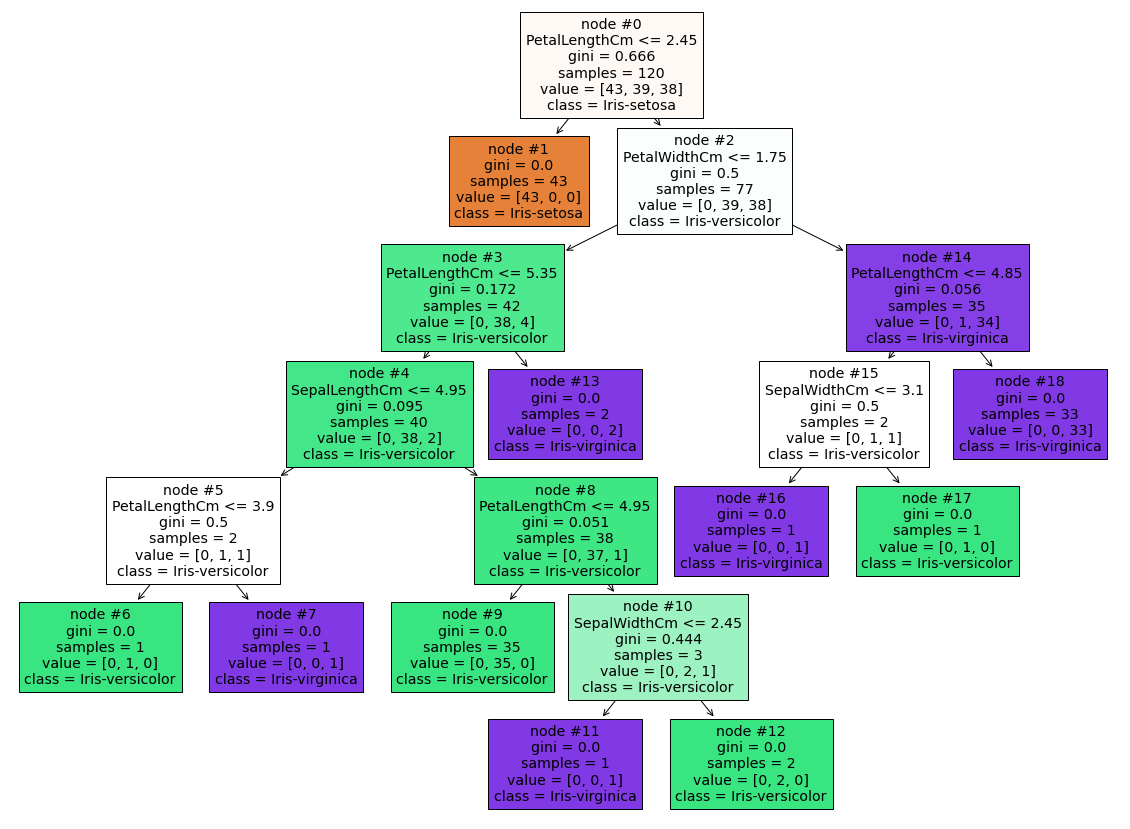

In [12]:
fnames = df.columns[:4]
cnames = df['Species'].unique()
plt.figure(figsize=(20,15))
plot_tree(model,feature_names=fnames, class_names = cnames, filled=True, node_ids = True)
plt.show()

## Performance Evaluation

In [13]:
#Performance of the model on train data
y_train_pred = model.predict(x_train)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.recall_score(y_train, y_train_pred, average='macro'))
print(metrics.f1_score(y_train, y_train_pred, average='macro'))

1.0
1.0
1.0


In [14]:
#Performance of the model on test data
y_test_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.recall_score(y_test, y_test_pred, average='macro'))
print(metrics.f1_score(y_test, y_test_pred, average='macro'))

0.9666666666666667
0.9722222222222222
0.9710144927536232
